In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,log_loss,precision_score,recall_score,jaccard_score,hamming_loss,classification_report,roc_auc_score,roc_curve
from sklearn.preprocessing import LabelBinarizer
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('MI.data',na_values='?')
column_names = ['ID', 'AGE', 'SEX', 'INF_ANAM', 'STENOK_AN', 'FK_STENOK', 'IBS_POST', 'IBS_NASL', 'GB', 'SIM_GIPERT', 'DLIT_AG', 'ZSN_A', 'nr_11', 'nr_01', 'nr_02', 'nr_03', 'nr_04', 'nr_07', 'nr_08', 'np_01', 'np_04', 'np_05', 'np_07', 'np_08', 'np_09', 'np_10', 'endocr_01', 'endocr_02', 'endocr_03', 'zab_leg_01', 'zab_leg_02', 'zab_leg_03', 'zab_leg_04', 'zab_leg_06', 'S_AD_KBRIG', 'D_AD_KBRIG', 'S_AD_ORIT', 'D_AD_ORIT', 'O_L_POST', 'K_SH_POST', 'MP_TP_POST', 'SVT_POST', 'GT_POST', 'FIB_G_POST', 'ant_im', 'lat_im', 'inf_im', 'post_im', 'IM_PG_P', 'ritm_ecg_p_01', 'ritm_ecg_p_02', 'ritm_ecg_p_04', 'ritm_ecg_p_06', 'ritm_ecg_p_07', 'ritm_ecg_p_08', 'n_r_ecg_p_01', 'n_r_ecg_p_02', 'n_r_ecg_p_03', 'n_r_ecg_p_04', 'n_r_ecg_p_05', 'n_r_ecg_p_06', 'n_r_ecg_p_08', 'n_r_ecg_p_09', 'n_r_ecg_p_10', 'n_p_ecg_p_01', 'n_p_ecg_p_03', 'n_p_ecg_p_04', 'n_p_ecg_p_05', 'n_p_ecg_p_06', 'n_p_ecg_p_07', 'n_p_ecg_p_08', 'n_p_ecg_p_09', 'n_p_ecg_p_10', 'n_p_ecg_p_11', 'n_p_ecg_p_12', 'fibr_ter_01', 'fibr_ter_02', 'fibr_ter_03', 'fibr_ter_05', 'fibr_ter_06', 'fibr_ter_07', 'fibr_ter_08', 'GIPO_K', 'K_BLOOD', 'GIPER_NA', 'NA_BLOOD', 'ALT_BLOOD', 'AST_BLOOD', 'KFK_BLOOD', 'L_BLOOD', 'ROE', 'TIME_B_S', 'R_AB_1_n', 'R_AB_2_n', 'R_AB_3_n', 'NA_KB', 'NOT_NA_KB', 'LID_KB', 'NITR_S', 'NA_R_1_n', 'NA_R_2_n', 'NA_R_3_n', 'NOT_NA_1_n', 'NOT_NA_2_n', 'NOT_NA_3_n', 'LID_S_n', 'B_BLOK_S_n', 'ANT_CA_S_n', 'GEPAR_S_n', 'ASP_S_n', 'TIKL_S_n', 'TRENT_S_n', 'FIBR_PREDS', 'PREDS_TAH', 'JELUD_TAH', 'FIBR_JELUD', 'A_V_BLOK', 'OTEK_LANC', 'RAZRIV', 'DRESSLER', 'ZSN', 'REC_IM', 'P_IM_STEN', 'LET_IS']
df.columns=column_names

for col in df.columns:
  if(df[col].isin([0,1,2,3,4,5,np.nan]).all()):
    df[col]=df[col].fillna(df[col].mode()[0])
  else:
    df[col]=df[col].fillna(df[col].median())


x=df.iloc[:,2:75]
y=df.iloc[:,123]

features=['SEX', 'INF_ANAM', 'STENOK_AN', 'FK_STENOK', 'IBS_POST', 'IBS_NASL', 'GB', 'SIM_GIPERT', 'DLIT_AG', 'ZSN_A', 'nr_11', 'nr_01', 'nr_03', 'nr_04', 'np_05', 'np_08', 'endocr_01', 'endocr_02', 'zab_leg_01', 'zab_leg_02', 'zab_leg_03', 'zab_leg_04', 'S_AD_KBRIG', 'D_AD_KBRIG', 'S_AD_ORIT', 'D_AD_ORIT', 'O_L_POST', 'K_SH_POST', 'MP_TP_POST', 'SVT_POST', 'FIB_G_POST', 'ant_im', 'lat_im', 'inf_im', 'post_im', 'IM_PG_P', 'ritm_ecg_p_01', 'ritm_ecg_p_02', 'ritm_ecg_p_04', 'ritm_ecg_p_07', 'ritm_ecg_p_08', 'n_r_ecg_p_01', 'n_r_ecg_p_02', 'n_r_ecg_p_03', 'n_r_ecg_p_04', 'n_r_ecg_p_05', 'n_r_ecg_p_06', 'n_r_ecg_p_08', 'n_p_ecg_p_03', 'n_p_ecg_p_06', 'n_p_ecg_p_07', 'n_p_ecg_p_08', 'n_p_ecg_p_09', 'n_p_ecg_p_10', 'n_p_ecg_p_11', 'n_p_ecg_p_12']

print(len(features))
x=x[features]

smote = SMOTE(random_state=42)
x_resampled, y_resampled = smote.fit_resample(x, y)

x_train, x_test, y_train, y_test = train_test_split(x_resampled, y_resampled, test_size=0.2, random_state=42)

56


In [ ]:
model=LogisticRegression(multi_class='multinomial',solver='newton-cg', random_state=42)
model.fit(x_train,y_train)

LogisticRegression(multi_class='multinomial', random_state=42,
                   solver='newton-cg')

In [ ]:
y_pred=model.predict(x_test)
acc=accuracy_score(y_test,y_pred)
print(acc)

0.7986870897155361


In [ ]:
y_pred_prob=model.predict_proba(x_test)
lb = LabelBinarizer()
y_test_encoded = lb.fit_transform(y_test)

logloss=log_loss(y_test_encoded,y_pred_prob)
print(logloss)

0.7293412298901168


In [ ]:
jacc=jaccard_score(y_test,y_pred,average='macro')
print(jacc)

0.6257965822016768


In [ ]:
HammLoss=hamming_loss(y_test,y_pred)
print(HammLoss)

0.23719912472647703


In [ ]:
c_report=classification_report(y_test,y_pred)
print(c_report)

              precision    recall  f1-score   support

           0       0.63      0.57      0.60       294
           1       0.76      0.64      0.70       294
           2       0.82      0.84      0.83       319
           3       0.67      0.75      0.71       280
           4       0.83      0.88      0.85       272
           5       0.89      0.93      0.91       271
           6       0.69      0.70      0.70       286
           7       0.81      0.80      0.81       269

    accuracy                           0.76      2285
   macro avg       0.76      0.76      0.76      2285
weighted avg       0.76      0.76      0.76      2285



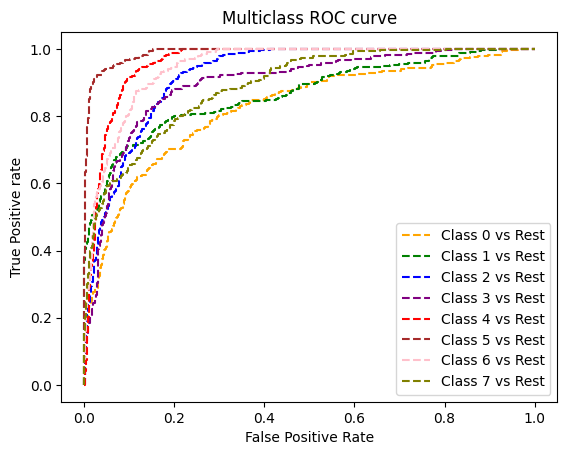

In [ ]:
fpr={}
tpr={}
thresh={}

for i in range(8):
  fpr[i],tpr[i],thresh[i]=roc_curve(y_test,y_pred_prob[:,i],pos_label=i)

plt.plot(fpr[0], tpr[0], linestyle='--',color='orange', label='Class 0 vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Class 1 vs Rest')
plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label='Class 2 vs Rest')
plt.plot(fpr[3], tpr[3], linestyle='--',color='purple', label='Class 3 vs Rest')
plt.plot(fpr[4], tpr[4], linestyle='--',color='red', label='Class 4 vs Rest')
plt.plot(fpr[5], tpr[5], linestyle='--',color='brown', label='Class 5 vs Rest')
plt.plot(fpr[6], tpr[6], linestyle='--',color='pink', label='Class 6 vs Rest')
plt.plot(fpr[7], tpr[7], linestyle='--',color='olive', label='Class 7 vs Rest')
plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.savefig('Multiclass ROC',dpi=300);

In [ ]:
roc_auc=roc_auc_score(y_test_encoded,y_pred_prob,average='macro',multi_class='ovo')
print(roc_auc)

0.9113910327312784
